In [2]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
import cv2
import glob
from tensorflow import keras
from keras.layers import Dense 
from tensorflow.keras.layers import Input
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras import callbacks
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.efficientnet_v2 import EfficientNetV2L
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

2023-11-17 16:08:28.940586: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-17 16:08:28.962496: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 16:08:28.962520: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 16:08:28.962541: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 16:08:28.967060: I tensorflow/core/platform/cpu_feature_g

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator  # Import the ImageDataGenerator


In [4]:
TRAIN_DIR = r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train"
TEST_DIR = r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/test"
TRAIN_LABEL = r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/train_labels.csv"
TEST_LABEL =  r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/test_labels.csv"

In [5]:
import pandas as pd
import os

# # Define the paths to your train and test image directories and the label CSV file
# train_image_dir = 'path/to/train/images'
# test_image_dir = 'path/to/test/images'
# label_csv_file = 'path/to/labels.csv'

# Load the label CSV file into a pandas dataframe
labels_train = pd.read_csv(TRAIN_LABEL)

labels_train

,image,emotion,pixels
0,train_00001_aligned.jpg,5,[202 202 202 ... 180 180 180]
1,train_00002_aligned.jpg,5,[ 90 62 105 ... 147 126 148]
2,train_00003_aligned.jpg,4,[23 30 45 ... 32 47 66]
3,train_00004_aligned.jpg,4,[ 76 92 115 ... 55 75 110]
4,train_00005_aligned.jpg,5,[ 28 28 28 ... 203 203 203]
...,...,...,...
12266,train_12267_aligned.jpg,7,[ 26 26 26 ... 100 100 100]
12267,train_12268_aligned.jpg,7,[146 171 197 ... 170 188 205]
12268,train_12269_aligned.jpg,7,[ 48 27 36 ... 129 91 91]
12269,train_12270_aligned.jpg,7,[90 90 90 ... 97 97 97]


In [6]:
# Path to be added before every row in the 'image' column (using a raw string)
path = r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train"

# Adding path before every row in the 'image' column
labels_train['image'] = path +'/'+ labels_train['image']

# Updated DataFrame
labels_train.head()

labels_train['image'][0]

'/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train/train_00001_aligned.jpg'

In [7]:
labels_test = pd.read_csv(TEST_LABEL)
path = r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/test"

# Adding path before every row in the 'image' column
labels_test['image'] = path +'/'+ labels_test['image']

# Updated DataFrame
display(labels_test)
labels_test['image'][0]

,image,emotion,pixels
0,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,5,[54 67 99 ... 46 53 73]
1,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,1,[ 76 98 116 ... 204 187 166]
2,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,4,[ 19 34 43 ... 208 236 243]
3,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,1,[ 29 31 32 ... 117 150 196]
4,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,5,[ 15 37 65 ... 2 138 216]
...,...,...,...
3063,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,7,[110 135 179 ... 66 45 43]
3064,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,7,[ 78 87 124 ... 45 60 93]
3065,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,7,[61 52 39 ... 53 43 36]
3066,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,7,[118 147 156 ... 85 116 171]


'/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/test/test_0001_aligned.jpg'

In [8]:
#labels_test = np.array(labels_test)
labels_test_value = np.array(labels_test['emotion'])
np.unique(labels_test_value)


array([1, 2, 3, 4, 5, 6, 7])

In [9]:
labels_test["emotion"]

0       5
1       1
2       4
3       1
4       5
       ..
3063    7
3064    7
3065    7
3066    7
3067    7
Name: emotion, Length: 3068, dtype: int64

In [10]:
from PIL import Image

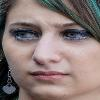

In [11]:
Image.open(r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train/train_00001_aligned.jpg")

In [12]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = Image.open(image_path).resize((48, 48))
        img_array = np.array(img)
        features.append(img_array)
    features = np.array(features)
    return features

In [13]:
labels_train['image'][0]

'/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train/train_00001_aligned.jpg'

In [14]:
train_features = extract_features(labels_train['image'])

  0%|          | 0/12271 [00:00<?, ?it/s]

In [15]:
test_features = extract_features(labels_test['image'])

  0%|          | 0/3068 [00:00<?, ?it/s]

In [16]:
train_features

array([[[[ 86,  95,  94],
         [ 64,  66,  68],
         [ 59,  57,  58],
         ...,
         [ 49, 111, 114],
         [ 43,  56,  61],
         [ 60,  61,  65]],

        [[ 73,  82,  82],
         [ 48,  51,  52],
         [ 40,  38,  39],
         ...,
         [ 71, 129, 132],
         [ 49,  71,  75],
         [ 55,  64,  69]],

        [[ 49,  58,  60],
         [ 45,  47,  49],
         [ 60,  58,  58],
         ...,
         [ 84, 136, 139],
         [ 54,  89,  93],
         [ 49,  74,  80]],

        ...,

        [[ 15,  24,  23],
         [  6,  14,  15],
         [  4,  10,  14],
         ...,
         [184, 158, 144],
         [187, 159, 147],
         [190, 161, 149]],

        [[ 18,  24,  26],
         [ 16,  20,  21],
         [ 13,  14,  16],
         ...,
         [190, 164, 152],
         [191, 167, 154],
         [194, 171, 157]],

        [[  7,  11,  15],
         [ 18,  22,  23],
         [ 11,  11,  13],
         ...,
         [191, 166, 154],
        

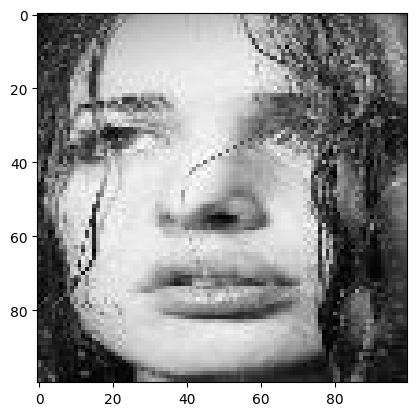

In [17]:
img = Image.open(labels_train["image"][1])
plt.imshow(img)

In [18]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [19]:
x_train.shape

(12271, 48, 48, 3)

In [20]:
labels_train['emotion'][:5]

0    5
1    5
2    4
3    4
4    5
Name: emotion, dtype: int64

In [21]:
labels_train['emotion']-1

0        4
1        4
2        3
3        3
4        4
        ..
12266    6
12267    6
12268    6
12269    6
12270    6
Name: emotion, Length: 12271, dtype: int64

In [22]:
labels_train['emotion'] = labels_train['emotion']-1
labels_test['emotion'] = labels_test['emotion']-1
y_train = (labels_train['emotion'])
y_test = (labels_test['emotion'])

In [23]:
labels_train['emotion'].value_counts()

emotion
3    4772
6    2524
4    1982
0    1290
2     717
5     705
1     281
Name: count, dtype: int64

In [24]:

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [25]:
# config
input_shape = (48, 48, 3)
output_class = 7

In [26]:
labels_train

,image,emotion,pixels
0,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,4,[202 202 202 ... 180 180 180]
1,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,4,[ 90 62 105 ... 147 126 148]
2,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,3,[23 30 45 ... 32 47 66]
3,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,3,[ 76 92 115 ... 55 75 110]
4,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,4,[ 28 28 28 ... 203 203 203]
...,...,...,...
12266,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,6,[ 26 26 26 ... 100 100 100]
12267,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,6,[146 171 197 ... 170 188 205]
12268,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,6,[ 48 27 36 ... 129 91 91]
12269,/media/hpc-lavasa/Data/22_Suman D/Suman Resear...,6,[90 90 90 ... 97 97 97]


In [27]:
labels_train.emotion

0        4
1        4
2        3
3        3
4        4
        ..
12266    6
12267    6
12268    6
12269    6
12270    6
Name: emotion, Length: 12271, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(labels_train.label, test_size=0.2, random_state=42)

In [29]:
x_train.shape

(12271, 48, 48, 3)

In [30]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
#datagen = ImageDataGenerator(
#    rotation_range=20,      # Degree range for random rotations
#    width_shift_range=0.2,  # Fraction of total width for random horizontal shift
#    height_shift_range=0.2, # Fraction of total height for random vertical shift
#    shear_range=0.2,        # Shear intensity (shear angle in radians)
#    zoom_range=0.2,         # Random zoom range
#    horizontal_flip=True,   # Randomly flip inputs horizontally
#    fill_mode='nearest'     # Points outside the boundaries are filled according to the given mode
#)

# Assuming x_train is your training dataset (numpy array of images)
# Create a generator for augmented data
#augmented_data_generator = datagen.flow(x_train, y_train, batch_size=32)

# Train your model using the augmented data generator
#history = model.fit_generator(augmented_data_generator, steps_per_epoch=len(x_train)//32, epochs=25, validation_data=(x_test, y_test))


In [31]:
# model = Sequential()
# # convolutional layers
# model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# # fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))

# # output layer
# model.add(Dense(output_class, activation='softmax'))




#model = tf.keras.applications.resnet50.ResNet50(
#    include_top=True,
#    weights=None,
#    input_tensor=None,
#    input_shape=(48, 48, 3),
#    pooling=None,
#    classes=7,
#)

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
#history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))

In [32]:
len(x_train)

12271

In [33]:
len(y_train)

12271

In [34]:
len(x_test)

3068

In [35]:
len(y_test)

3068

In [36]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model

# # Define DPN model
# def create_dpn_model(input_shape, num_classes):
#     input_tensor = Input(shape=input_shape)
    
#     # DPN architecture
#     # Define your DPN layers here
#     # Example:
#     x = Conv2D(64, (3, 3), padding='same')(input_tensor)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
    
#     # Add more Conv2D, BatchNormalization, Activation, and pooling layers as needed
    
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for classification
    
#     model = Model(inputs=input_tensor, outputs=x)
#     return model

# # Define input shape and number of classes
# input_shape = (48, 48, 3)  # Assuming input images are resized to 48x48 with 3 channels (RGB)
# num_classes = 7  # Number of output classes

# # Create DPN model
# model = create_dpn_model(input_shape, num_classes)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Assuming you have x_train, y_train, x_test, and y_test prepared
# # Train the model
# history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=25, validation_data=(x_test, y_test))


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # Assuming 7 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming x_train, y_train, x_test, y_test are your training and test datasets
# Define data augmentation parameters
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for augmented data
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=32)

# Train your model using the augmented data generator
history = model.fit(augmented_data_generator, steps_per_epoch=len(x_train) // 32, epochs=60, validation_data=(x_test, y_test))


Epoch 1/60


2023-11-17 16:08:33.216066: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 16:08:33.236490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-17 16:08:33.236610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

383/383 [==============================] - 7s 10ms/step - loss: 1.6140 - accuracy: 0.3928 - val_loss: 1.5381 - val_accuracy: 0.4025
Epoch 2/60
383/383 [==============================] - 3s 9ms/step - loss: 1.5629 - accuracy: 0.4049 - val_loss: 1.5049 - val_accuracy: 0.4012
Epoch 3/60
383/383 [==============================] - 4s 9ms/step - loss: 1.5420 - accuracy: 0.4130 - val_loss: 1.4730 - val_accuracy: 0.4299
Epoch 4/60
383/383 [==============================] - 3s 9ms/step - loss: 1.5049 - accuracy: 0.4339 - val_loss: 1.3681 - val_accuracy: 0.4782
Epoch 5/60
383/383 [==============================] - 3s 9ms/step - loss: 1.4215 - accuracy: 0.4704 - val_loss: 1.1935 - val_accuracy: 0.5704
Epoch 6/60
383/383 [==============================] - 3s 9ms/step - loss: 1.3368 - accuracy: 0.5055 - val_loss: 1.0917 - val_accuracy: 0.6076
Epoch 7/60
383/383 [==============================] - 3s 9ms/step - loss: 1.2667 - accuracy: 0.5335 - val_loss: 1.0431 - val_accuracy: 0.6167
Epoch 8/60
383/3

In [38]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the MobileNetV2 model with pre-trained weights (exclude top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create your model architecture by adding additional layers on top of MobileNetV2
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Assuming 7 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming x_train, y_train, x_test, y_test are your training and test datasets
# Define data augmentation parameters
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for augmented data
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=32)

# Train your model using the augmented data generator
history = model.fit(augmented_data_generator, steps_per_epoch=len(x_train) // 32, epochs=70, validation_data=(x_test, y_test))


Epoch 1/70
383/383 [==============================] - 16s 15ms/step - loss: 1.5970 - accuracy: 0.4211 - val_loss: 2.4717 - val_accuracy: 0.4462
Epoch 2/70
383/383 [==============================] - 5s 12ms/step - loss: 1.3331 - accuracy: 0.5138 - val_loss: 1.8809 - val_accuracy: 0.5548
Epoch 3/70
383/383 [==============================] - 4s 12ms/step - loss: 1.2129 - accuracy: 0.5670 - val_loss: 2.6554 - val_accuracy: 0.5016
Epoch 4/70
383/383 [==============================] - 5s 12ms/step - loss: 1.1934 - accuracy: 0.5786 - val_loss: 1.7459 - val_accuracy: 0.5355
Epoch 5/70
383/383 [==============================] - 5s 12ms/step - loss: 1.1402 - accuracy: 0.5960 - val_loss: 1.4732 - val_accuracy: 0.5515
Epoch 6/70
383/383 [==============================] - 5s 12ms/step - loss: 1.0964 - accuracy: 0.6095 - val_loss: 2.6801 - val_accuracy: 0.4827
Epoch 7/70
383/383 [==============================] - 5s 12ms/step - loss: 1.0463 - accuracy: 0.6283 - val_loss: 1.4301 - val_accuracy: 0.628

In [39]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the VGG16 model with pre-trained weights (exclude top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create your model architecture by adding additional layers on top of VGG16
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Assuming 7 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming x_train, y_train, x_test, y_test are your training and test datasets
# Define data augmentation parameters
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for augmented data
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=32)

# Train your model using the augmented data generator
history = model.fit(augmented_data_generator, steps_per_epoch=len(x_train) // 32, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
383/383 [==============================] - 7s 13ms/step - loss: 1.6517 - accuracy: 0.3884 - val_loss: 1.6102 - val_accuracy: 0.3859
Epoch 2/50
383/383 [==============================] - 4s 11ms/step - loss: 1.6112 - accuracy: 0.3892 - val_loss: 1.5707 - val_accuracy: 0.3859
Epoch 3/50
383/383 [==============================] - 4s 11ms/step - loss: 1.5970 - accuracy: 0.3899 - val_loss: 1.5656 - val_accuracy: 0.3889
Epoch 4/50
383/383 [==============================] - 4s 11ms/step - loss: 1.5804 - accuracy: 0.3948 - val_loss: 1.5308 - val_accuracy: 0.4078
Epoch 5/50
383/383 [==============================] - 4s 11ms/step - loss: 1.5575 - accuracy: 0.4065 - val_loss: 1.4935 - val_accuracy: 0.4443
Epoch 6/50
383/383 [==============================] - 4s 11ms/step - loss: 1.5368 - accuracy: 0.4061 - val_loss: 1.4637 - val_accuracy: 0.4136
Epoch 7/50
383/383 [==============================] - 4s 11ms/step - loss: 1.5117 - accuracy: 0.4302 - val_loss: 1.5395 - val_accuracy: 0.4198

## EfficientNet

In [40]:
input_tensor = tf.keras.Input(shape=(100, 100, 3))

In [41]:
train_csv = pd.read_csv(r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/train_labels.csv")
test_csv = pd.read_csv(r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/test_labels.csv")
train_csv['emotion'] = train_csv['emotion'].astype(str)
test_csv['emotion'] = test_csv['emotion'].astype(str)

In [42]:
datagen_train=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_generator=datagen_train.flow_from_dataframe(
dataframe=train_csv,
directory=r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train" , 
x_col="image",
y_col="emotion",
batch_size=64,
color_mode='rgb',
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

datagen_test=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_generator=datagen_test.flow_from_dataframe(
dataframe=test_csv,
directory=r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/test",
x_col="image",
y_col="emotion",
batch_size=64,
seed=42,
color_mode='rgb',
shuffle=True,
class_mode="categorical",
target_size=(100,100))

Found 12271 validated image filenames belonging to 7 classes.
Found 3068 validated image filenames belonging to 7 classes.


In [43]:
img_width, img_height = 100, 100

input_tensor = tf.keras.Input(shape=(img_width, img_height, 3))
base_model = tf.keras.applications.EfficientNetV2L(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(base_model.input, output)

In [44]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'binary_accuracy'])


In [48]:
mch = callbacks.ModelCheckpoint('/final-model.h5' , monitor='val_loss' , mode ='min' , save_best_only=True)

In [49]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_generator.labels),y = train_generator.labels)
class_weights = {i : class_weights[i] for i in range(7)}


In [51]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=test_generator, validation_steps=len(test_generator)  , class_weight = class_weights)


Epoch 1/100
192/192 [==============================] - 55s 288ms/step - loss: 0.3898 - precision: 0.3155 - recall: 0.0125 - binary_accuracy: 0.8551 - val_loss: 0.5570 - val_precision: 0.0528 - val_recall: 0.0528 - val_binary_accuracy: 0.7294
Epoch 2/100
192/192 [==============================] - 56s 290ms/step - loss: 0.3814 - precision: 0.4838 - recall: 0.0439 - binary_accuracy: 0.8567 - val_loss: 0.8878 - val_precision: 0.0241 - val_recall: 0.0241 - val_binary_accuracy: 0.7212
Epoch 3/100
192/192 [==============================] - 56s 290ms/step - loss: 0.3732 - precision: 0.7337 - recall: 0.1635 - binary_accuracy: 0.8720 - val_loss: 0.5355 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_binary_accuracy: 0.8570
Epoch 4/100
192/192 [==============================] - 56s 290ms/step - loss: 0.3519 - precision: 0.7725 - recall: 0.2535 - binary_accuracy: 0.8827 - val_loss: 0.3619 - val_precision: 0.6268 - val_recall: 0.2031 - val_binary_accuracy: 0.8689
Epoch 5/100
192/192 [===

In [52]:
model.save("EfficientNet.keras")


## Inceptionresnet

In [53]:
input_tensor = tf.keras.Input(shape=(100, 100, 3))

In [54]:
train_csv = pd.read_csv(r'/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/train_labels.csv')
test_csv = pd.read_csv(r'/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/test_labels.csv')
train_csv['emotion'] = train_csv['emotion'].astype(str)
test_csv['emotion'] = test_csv['emotion'].astype(str)

In [55]:
datagen_train=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_generator=datagen_train.flow_from_dataframe(
dataframe=train_csv,
directory=r'/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train' , 
x_col="image",
y_col="emotion",
batch_size=64,
color_mode='rgb',
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

datagen_test=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_generator=datagen_test.flow_from_dataframe(
dataframe=test_csv,
directory=r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/test",
x_col="image",
y_col="emotion",
batch_size=64,
seed=42,
color_mode='rgb',
shuffle=True,
class_mode="categorical",
target_size=(100,100))

Found 12271 validated image filenames belonging to 7 classes.
Found 3068 validated image filenames belonging to 7 classes.


In [56]:
img_width, img_height = 100, 100

input_tensor = tf.keras.Input(shape=(img_width, img_height, 3))
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(base_model.input, output)

In [57]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'binary_accuracy'])


In [58]:
mch = callbacks.ModelCheckpoint('/fianl-model.h5' , monitor='val_loss' , mode ='min' , save_best_only=True)

In [59]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_generator.labels),y = train_generator.labels)
class_weights = {i : class_weights[i] for i in range(7)}


In [60]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=test_generator, validation_steps=len(test_generator)  , class_weight = class_weights)


Epoch 1/100
192/192 [==============================] - 39s 82ms/step - loss: 0.3615 - precision_1: 0.6139 - recall_1: 0.2038 - binary_accuracy: 0.8679 - val_loss: 0.2877 - val_precision_1: 0.7266 - val_recall_1: 0.5127 - val_binary_accuracy: 0.9028
Epoch 2/100
192/192 [==============================] - 12s 63ms/step - loss: 0.2557 - precision_1: 0.7365 - recall_1: 0.5753 - binary_accuracy: 0.9099 - val_loss: 0.5830 - val_precision_1: 0.6460 - val_recall_1: 0.5776 - val_binary_accuracy: 0.8944
Epoch 3/100
192/192 [==============================] - 12s 63ms/step - loss: 0.2005 - precision_1: 0.7838 - recall_1: 0.6869 - binary_accuracy: 0.9282 - val_loss: 0.2099 - val_precision_1: 0.7513 - val_recall_1: 0.7031 - val_binary_accuracy: 0.9243
Epoch 4/100
192/192 [==============================] - 12s 63ms/step - loss: 0.1609 - precision_1: 0.8190 - recall_1: 0.7501 - binary_accuracy: 0.9406 - val_loss: 0.1761 - val_precision_1: 0.7918 - val_recall_1: 0.7536 - val_binary_accuracy: 0.9365
Epoc

In [61]:
model.save("Inceptionresnet.keras")

## Resnet

In [62]:
input_tensor = tf.keras.Input(shape=(100, 100, 3))

In [63]:
train_csv = pd.read_csv(r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/train_labels.csv")
test_csv = pd.read_csv(r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/test_labels.csv")
train_csv['emotion'] = train_csv['emotion'].astype(str)
test_csv['emotion'] = test_csv['emotion'].astype(str)

In [64]:
datagen_train=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_generator=datagen_train.flow_from_dataframe(
dataframe=train_csv,
directory=r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train" , 
x_col="image",
y_col="emotion",
batch_size=64,
color_mode='rgb',
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

datagen_test=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_generator=datagen_test.flow_from_dataframe(
dataframe=test_csv,
directory=r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/test",
x_col="image",
y_col="emotion",
batch_size=64,
seed=42,
color_mode='rgb',
shuffle=True,
class_mode="categorical",
target_size=(100,100))

Found 12271 validated image filenames belonging to 7 classes.
Found 3068 validated image filenames belonging to 7 classes.


In [65]:
img_width, img_height = 100, 100

input_tensor = tf.keras.Input(shape=(img_width, img_height, 3))
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(base_model.input, output)

In [66]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'binary_accuracy'])


In [67]:
mch = callbacks.ModelCheckpoint('/fianl-model.h5' , monitor='val_loss' , mode ='min' , save_best_only=True)

In [68]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_generator.labels),y = train_generator.labels)
class_weights = {i : class_weights[i] for i in range(7)}


In [71]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=25, validation_data=test_generator, validation_steps=len(test_generator)  , class_weight = class_weights)


Epoch 1/25
192/192 [==============================] - 12s 60ms/step - loss: 0.0221 - precision_2: 0.9791 - recall_2: 0.9760 - binary_accuracy: 0.9936 - val_loss: 0.3222 - val_precision_2: 0.7810 - val_recall_2: 0.7754 - val_binary_accuracy: 0.9369
Epoch 2/25
192/192 [==============================] - 12s 60ms/step - loss: 0.0151 - precision_2: 0.9838 - recall_2: 0.9822 - binary_accuracy: 0.9951 - val_loss: 0.4464 - val_precision_2: 0.7792 - val_recall_2: 0.7774 - val_binary_accuracy: 0.9367
Epoch 3/25
192/192 [==============================] - 12s 60ms/step - loss: 0.0174 - precision_2: 0.9836 - recall_2: 0.9813 - binary_accuracy: 0.9950 - val_loss: 0.3910 - val_precision_2: 0.7843 - val_recall_2: 0.7774 - val_binary_accuracy: 0.9377
Epoch 4/25
192/192 [==============================] - 12s 60ms/step - loss: 0.0121 - precision_2: 0.9847 - recall_2: 0.9836 - binary_accuracy: 0.9955 - val_loss: 0.3232 - val_precision_2: 0.7823 - val_recall_2: 0.7767 - val_binary_accuracy: 0.9372
Epoch 5/

In [72]:
model.save("Resnet.keras")

## Resnet-150

In [73]:
input_tensor = tf.keras.Input(shape=(100, 100, 3))

In [74]:
train_csv = pd.read_csv(r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/train_labels.csv")
test_csv = pd.read_csv(r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/test_labels.csv")
train_csv['emotion'] = train_csv['emotion'].astype(str)
test_csv['emotion'] = test_csv['emotion'].astype(str)

In [75]:
datagen_train=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_generator=datagen_train.flow_from_dataframe(
dataframe=train_csv,
directory=r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/train" , 
x_col="image",
y_col="emotion",
batch_size=64,
color_mode='rgb',
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

datagen_test=ImageDataGenerator(rescale=1./255 ,  preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_generator=datagen_test.flow_from_dataframe(
dataframe=test_csv,
directory=r"/media/hpc-lavasa/Data/22_Suman D/Suman Research/Kaggle RAF-DB/DATASET/test",
x_col="image",
y_col="emotion",
batch_size=64,
seed=42,
color_mode='rgb',
shuffle=True,
class_mode="categorical",
target_size=(100,100))

Found 12271 validated image filenames belonging to 7 classes.
Found 3068 validated image filenames belonging to 7 classes.


In [76]:
img_width, img_height = 100, 100

input_tensor = tf.keras.Input(shape=(img_width, img_height, 3))
base_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(base_model.input, output)

In [77]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'binary_accuracy'])


In [78]:
mch = callbacks.ModelCheckpoint('/fianl-model.h5' , monitor='val_loss' , mode ='min' , save_best_only=True)

In [79]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(train_generator.labels),y = train_generator.labels)
class_weights = {i : class_weights[i] for i in range(7)}


In [80]:
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=test_generator, validation_steps=len(test_generator)  , class_weight = class_weights)


Epoch 1/100
192/192 [==============================] - 50s 143ms/step - loss: 0.4001 - precision_3: 0.7234 - recall_3: 0.1760 - binary_accuracy: 0.8727 - val_loss: 0.4150 - val_precision_3: 0.5306 - val_recall_3: 0.3083 - val_binary_accuracy: 0.8622
Epoch 2/100
192/192 [==============================] - 25s 129ms/step - loss: 0.3111 - precision_3: 0.7241 - recall_3: 0.4000 - binary_accuracy: 0.8925 - val_loss: 0.2911 - val_precision_3: 0.6456 - val_recall_3: 0.4632 - val_binary_accuracy: 0.8870
Epoch 3/100
192/192 [==============================] - 25s 129ms/step - loss: 0.2725 - precision_3: 0.7390 - recall_3: 0.5052 - binary_accuracy: 0.9038 - val_loss: 0.2489 - val_precision_3: 0.6816 - val_recall_3: 0.5903 - val_binary_accuracy: 0.9021
Epoch 4/100
192/192 [==============================] - 25s 129ms/step - loss: 0.2375 - precision_3: 0.7467 - recall_3: 0.5986 - binary_accuracy: 0.9137 - val_loss: 0.2495 - val_precision_3: 0.7318 - val_recall_3: 0.6359 - val_binary_accuracy: 0.9147


In [81]:
model.save("resnet150.keras")